In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataset= pd.read_csv('UberDataset.csv')

In [16]:
dataset.shape

(1156, 7)

In [18]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [20]:
dataset.info

<bound method DataFrame.info of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1

#Data Preprocessing

In [23]:
dataset['PURPOSE'].fillna("NOT", inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18692\4083644620.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace = True)


In [25]:
dataset.head

<bound method NDFrame.head of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1  

In [27]:
dataset['START_DATE']=pd.to_datetime(dataset['START_DATE'] ,errors = 'coerce')
dataset['END_DATE']=pd.to_datetime(dataset['END_DATE'] ,errors = 'coerce')

In [29]:
dataset.info

<bound method DataFrame.info of               START_DATE            END_DATE  CATEGORY             START  \
0    2016-01-01 21:11:00 2016-01-01 21:17:00  Business       Fort Pierce   
1    2016-01-02 01:25:00 2016-01-02 01:37:00  Business       Fort Pierce   
2    2016-01-02 20:25:00 2016-01-02 20:38:00  Business       Fort Pierce   
3    2016-01-05 17:31:00 2016-01-05 17:45:00  Business       Fort Pierce   
4    2016-01-06 14:42:00 2016-01-06 15:49:00  Business       Fort Pierce   
...                  ...                 ...       ...               ...   
1151                 NaT                 NaT  Business           Kar?chi   
1152                 NaT                 NaT  Business  Unknown Location   
1153                 NaT                 NaT  Business        Katunayake   
1154                 NaT                 NaT  Business           Gampaha   
1155                 NaT                 NaT       NaN               NaN   

                  STOP    MILES          PURPOSE  
0   

In [32]:
from datetime import datetime

dataset['date']= pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time']= pd.DatetimeIndex(dataset['START_DATE']).hour

In [34]:
dataset['day-night'] = pd.cut(x=dataset['time'], bins = [0,10,15,19,24], labels=['morining', 'afternoon', 'evening', 'night'])

In [36]:
dataset.dropna(inplace= True)

In [38]:
dataset.shape

(413, 10)

# DATA VISUALIZATION|

<Axes: xlabel='count', ylabel='PURPOSE'>

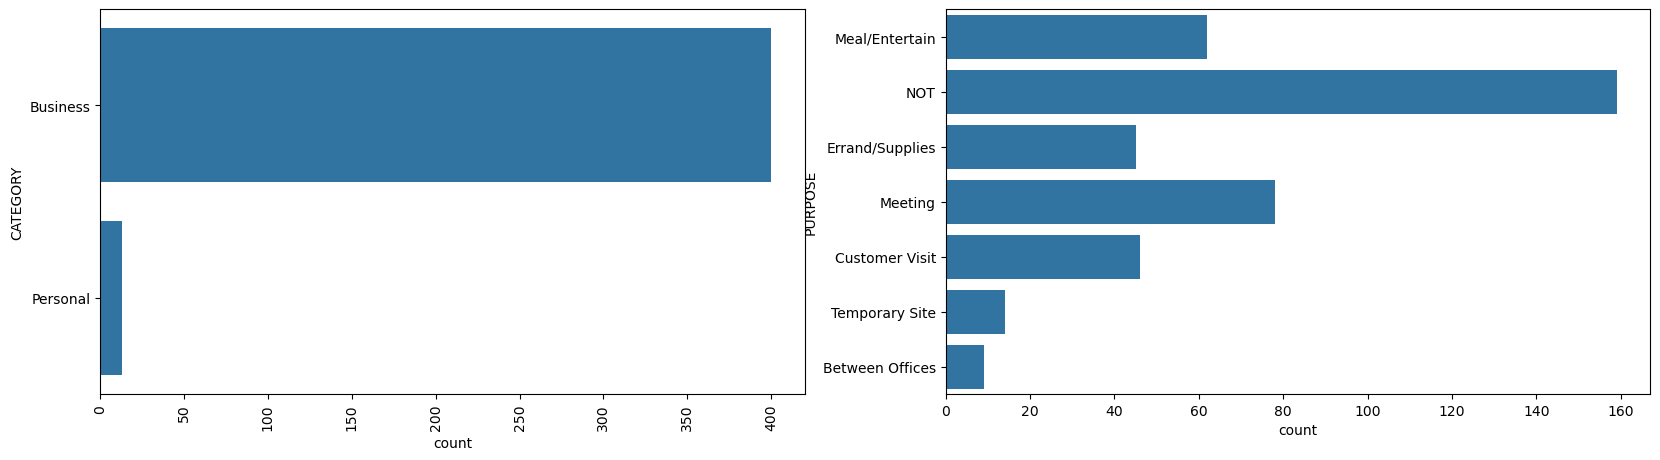

In [41]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])

<Axes: xlabel='count', ylabel='day-night'>

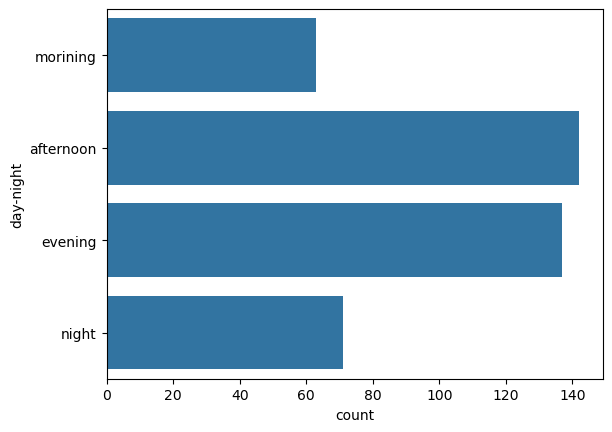

In [42]:
sns.countplot(dataset['day-night'])

In [45]:
dataset['MONTH']= pd.DatetimeIndex(dataset['START_DATE']).month
month_label={1.0:'jan', 2.0:'feb', 3.0:'march', 4.0: 'april', 5.0:'may', 6.0:'june', 7.0: 'july' , 8.0:'aug', 9.0:'sep',10.0:'oct',11.0 :'nov',12.0 :'dec'}

dataset['MONTH']= dataset.MONTH.map(month_label)

mon= dataset.MONTH.value_counts(sort= False)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

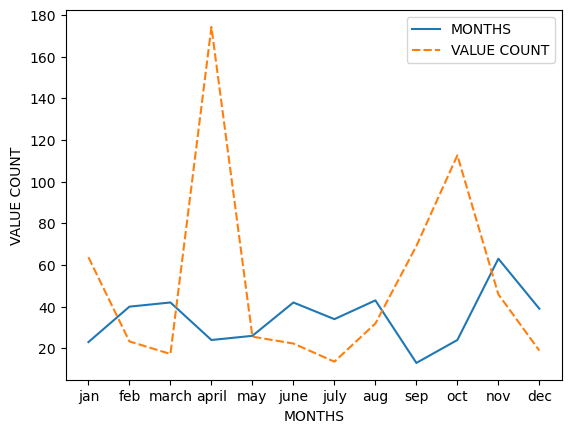

In [47]:
df= pd.DataFrame({ 
    "MONTHS": mon.values,
    "VALUE COUNT": dataset.groupby('MONTH', sort = False)['MILES'].max()
})
p= sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [55]:
dataset['DAY'] = dataset.START_DATE.dt.weekday

day_label= {
    0:'mon',1:'tue', 2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}

dataset['DAY'] = dataset['DAY'].map(day_label)

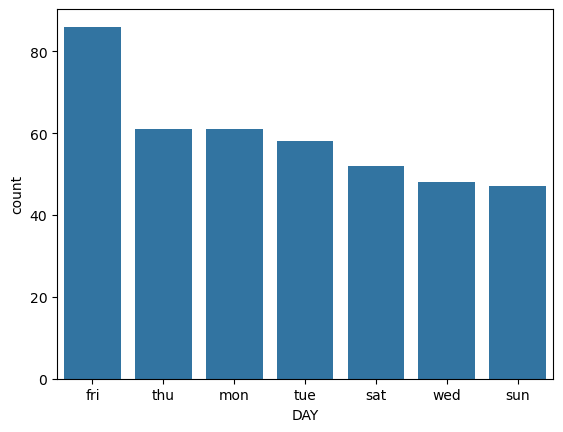

In [59]:
day_label= dataset.DAY.value_counts()

sns.barplot(x=day_label.index, y=day_label)
plt.xlabel=("DAY")
plt.ylabel=("Count")

<Axes: ylabel='MILES'>

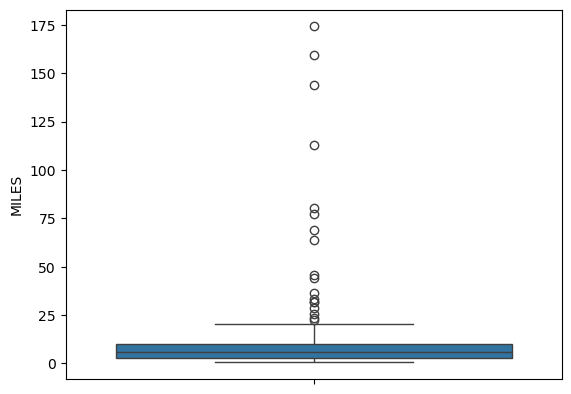

In [67]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

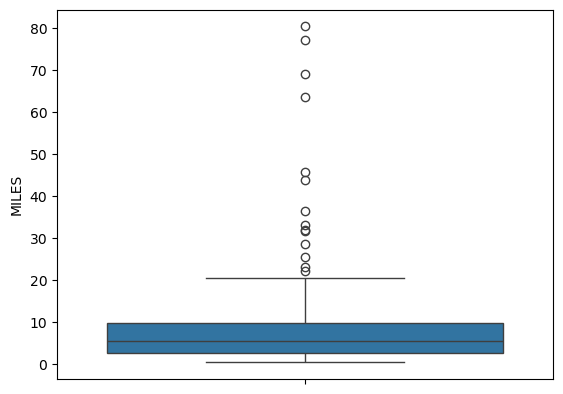

In [71]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_18692\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

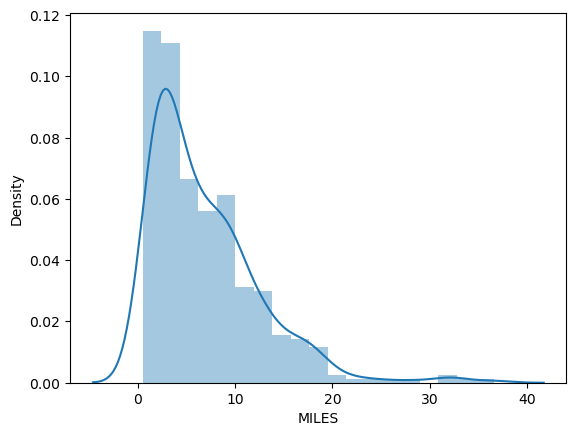

In [75]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])